## Notebook to explore python visualisation libraries

### Setup

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import warnings, logging

In [2]:
warnings.simplefilter("ignore")
logging.getLogger("matplotlib.font_manager").disabled = True

In [3]:
# Getting example dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

## Yellowbrick

- Docs: https://www.scikit-yb.org/en/latest/index.html

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression(),
)

In [7]:
feature_cols = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "Population",
    "AveOccup",
]

In [8]:
pipeline.fit(X_train[feature_cols], y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [9]:
r2_score(y_test, pipeline.predict(X_test[feature_cols]))

0.5627974688143418

#### Residual plot

In [10]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

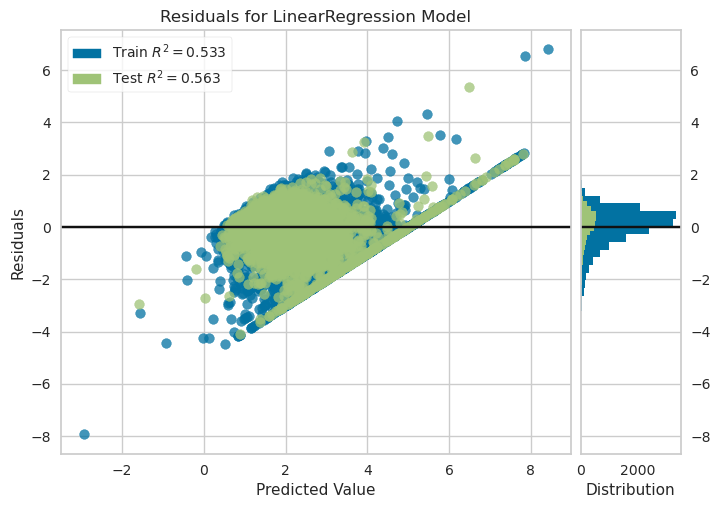

In [11]:
visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train[feature_cols], y_train)
visualizer.score(X_test[feature_cols], y_test)
visualizer.show();

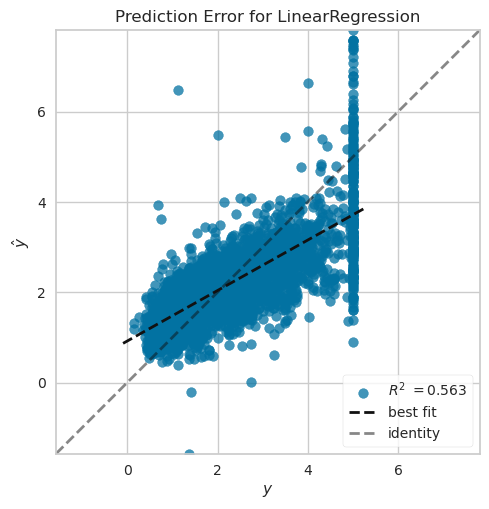

In [12]:
visualizer = PredictionError(pipeline)

visualizer.fit(
    X_train[feature_cols], y_train
)  # Fit the training data to the visualizer
visualizer.score(X_test[feature_cols], y_test)  # Evaluate the model on the test data
visualizer.show();  # Finalize and render the figure

Editing plots with MPL object-orientated interface

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(14, 12));

In [14]:
from yellowbrick.regressor.prediction_error import prediction_error
from yellowbrick.regressor import residuals_plot

In [15]:
# quick draw method
visualiser_errors = prediction_error(
    pipeline,
    X_train[feature_cols],
    y_train,
    X_test[feature_cols],
    y_test,
    show=False,
    shared_limits=False,
    ax=axs[0],
)

In [16]:
# quick draw method
visualiser_residuals = residuals_plot(
    pipeline,
    X_train[feature_cols],
    y_train,
    X_test[feature_cols],
    y_test,
    hist=False,
    qqplot=True,
    show=False,
    ax=axs[1],
)

In [17]:
visualiser_errors.ax.set_xlim([0, 6])
visualiser_errors.ax.set_ylim([0, 8])
visualiser_errors.ax.legend(loc=2);

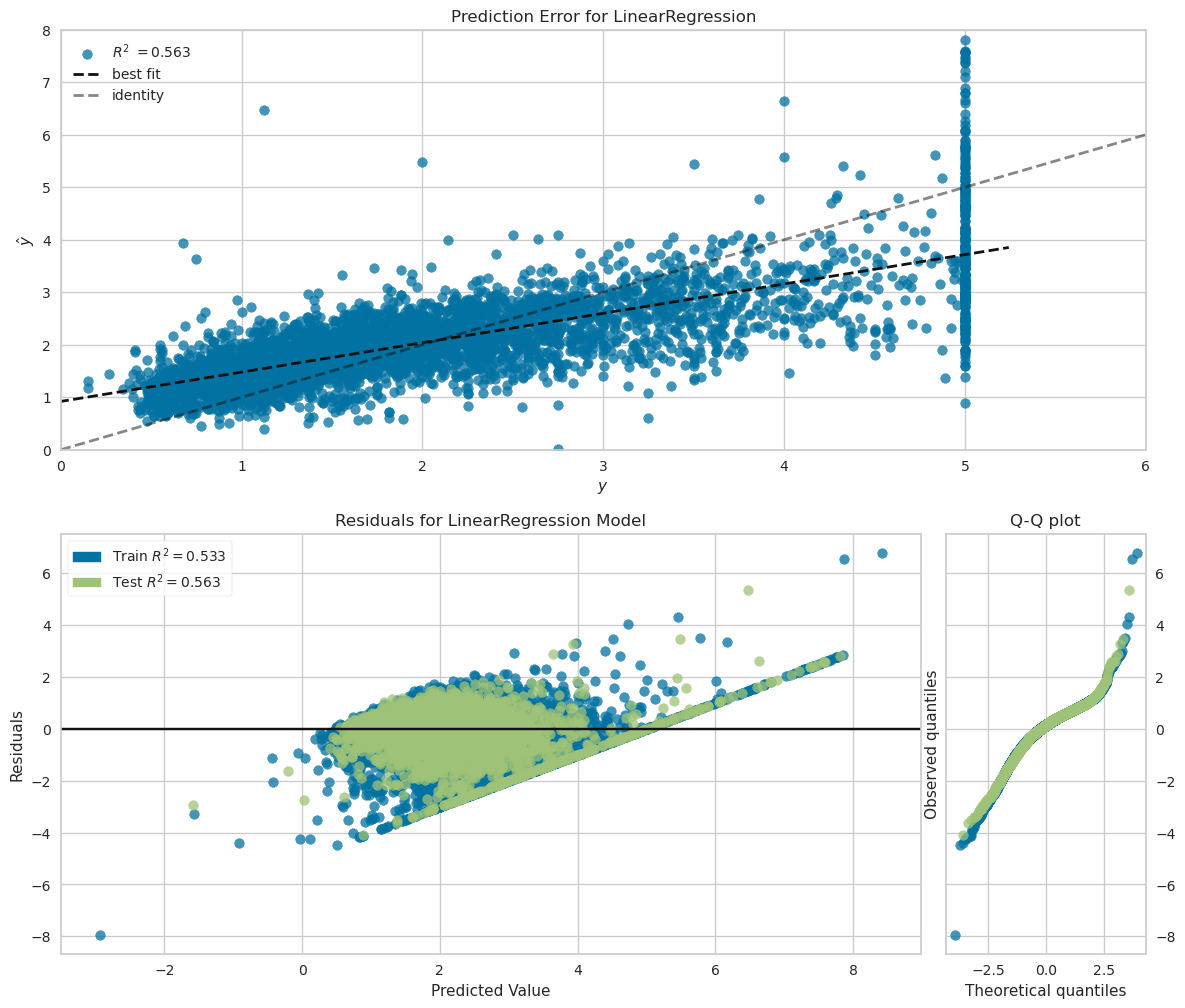

In [18]:
fig

In [19]:
fig.savefig("linear_regression_fit_residuals.png")

Notes:
- When functions are used, seems to be nicely compatible with matplotlib

## mlxtend

- Docs: https://rasbt.github.io/mlxtend/

Package isn't completely compatible with recent sklearn changes like the use of pandas dataframes.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [21]:
penguin_filepath = "../data/penguins_size.csv"

In [22]:
df_penguins = pd.read_csv(penguin_filepath)

In [23]:
penguin_feature_cols = [
    "culmen_length_mm",
    "culmen_depth_mm",
    # 'flipper_length_mm', 'body_mass_g',
]

In [24]:
le = LabelEncoder()

In [25]:
X = df_penguins[penguin_feature_cols]
y = le.fit_transform(df_penguins["species"])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
simple_inputer = SimpleImputer()
X_train = simple_inputer.fit_transform(X_train)
X_test = simple_inputer.transform(X_test)

In [28]:
lr_model = LogisticRegression().fit(X_train, y_train)
svc_model = SVC().fit(X_train, y_train)
adab_model = AdaBoostClassifier().fit(X_train, y_train)

In [ ]:
# plotting
figure, axes = plt.subplots(1, 3, figsize=(16, 6));

In [30]:
clf_names = ["Logistic regression", "SVC", "AdaBoost"]
clfs = [lr_model, svc_model, adab_model]

xlabel, ylabel = penguin_feature_cols
for clf, clf_name, ax in zip(clfs, clf_names, axes):
    plot_decision_regions(X_test, y_test, clf=clf, ax=ax)

    acc = accuracy_score(y_test, clf.predict(X_test))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{clf_name}: accuracy: {100.0 * acc:.2f}%")
;

''

<Figure size 800x550 with 0 Axes>

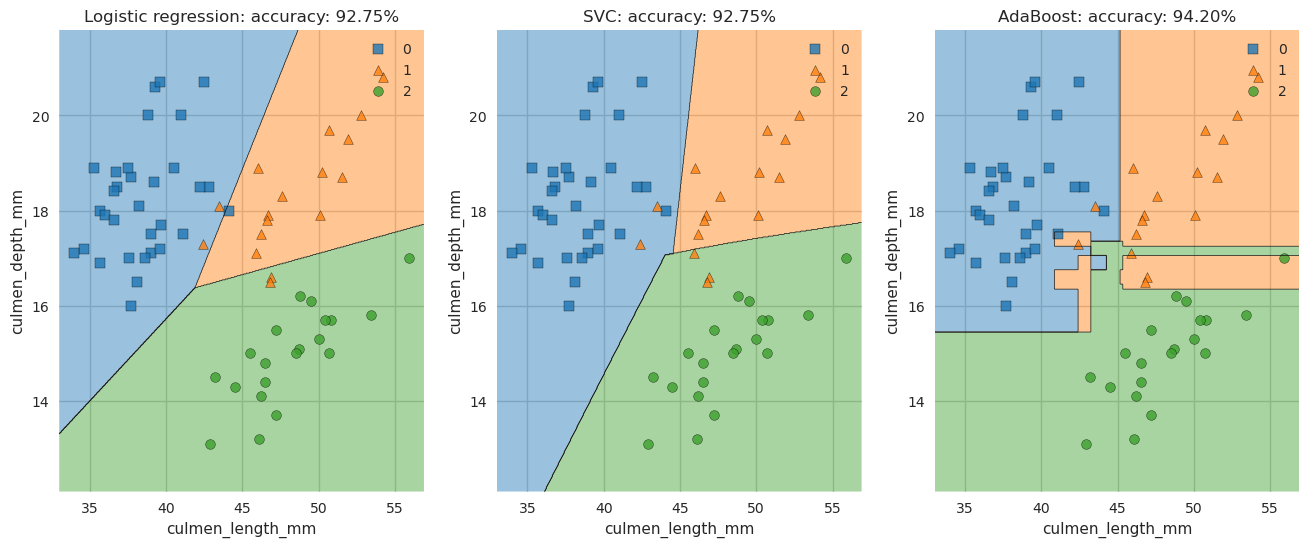

In [31]:
figure

Notes:
- Works well, but needs an updating to make the most of recent sklearn features, like pd.Dataframe as input

In [32]:
figure.savefig("decision_region_plots.png")

## mplfinance

Docs: 
- https://github.com/matplotlib/mplfinance/t 
- https://pypi.org/project/mplfinance/

In [33]:
import mplfinance as mpf
import matplotlib.pyplot as plt

In [34]:
df_AAPL = pd.read_csv("../data/AAPL.csv.zip")

In [35]:
df_AAPL.set_index("Date", inplace=True)
df_AAPL.index = pd.to_datetime(df_AAPL.index)
df_AAPL = df_AAPL[(df_AAPL.index > "2004-02-01") & (df_AAPL.index < "2004-05-01")]

In [36]:
mpf_styles = [
    "yahoo",
    "mike",
    "binance",
]

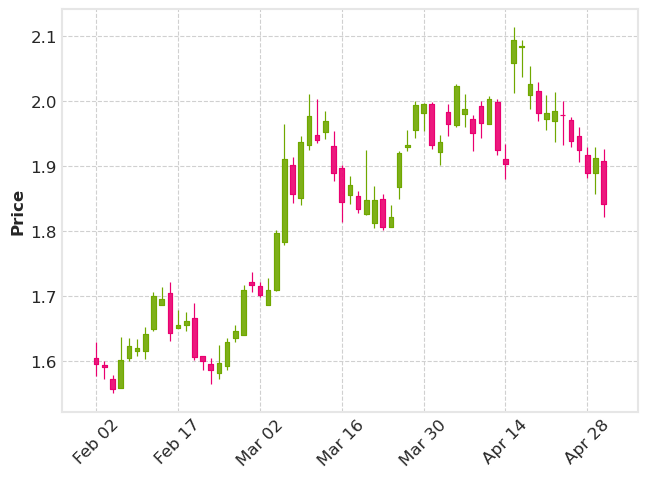

In [37]:
mpf.plot(df_AAPL, type="candle", style="binance")

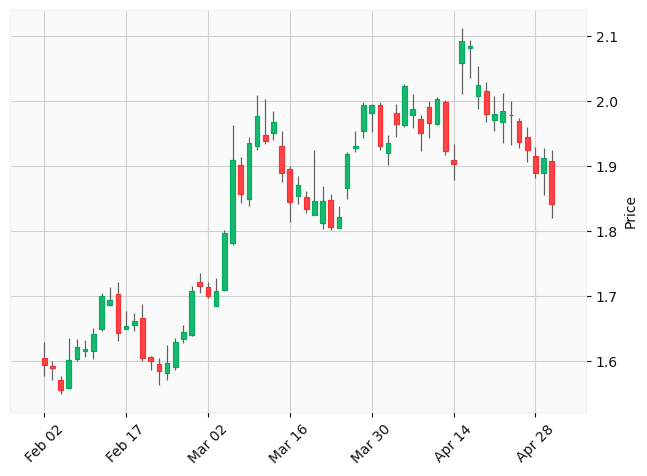

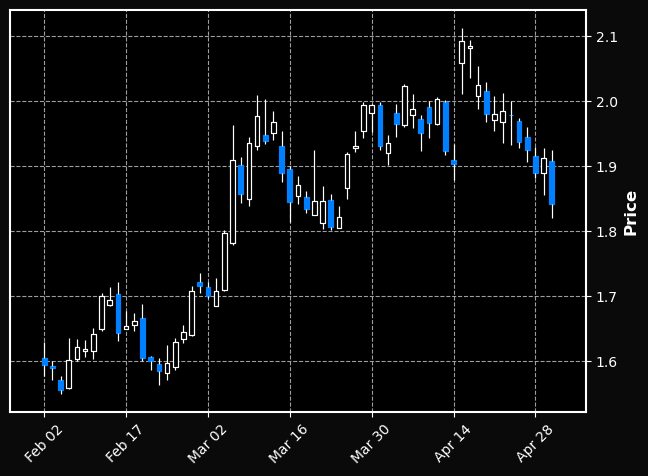

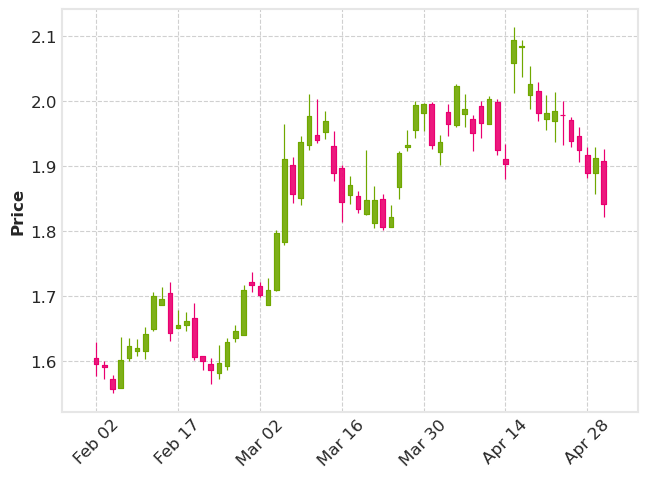

In [38]:
for mpf_style in mpf_styles:
    mpf.plot(df_AAPL, type="candle", style=mpf_style)

In [39]:
# showing make_addplot functionality

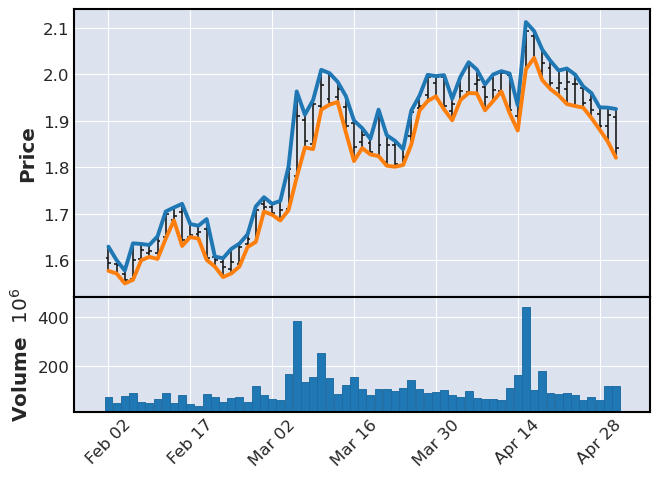

In [40]:
add_plots = mpf.make_addplot(df_AAPL[["High", "Low"]])
mpf.plot(df_AAPL, addplot=add_plots, volume=True)

In [41]:
df_AAPL["range"] = df_AAPL["High"] - df_AAPL["Low"]

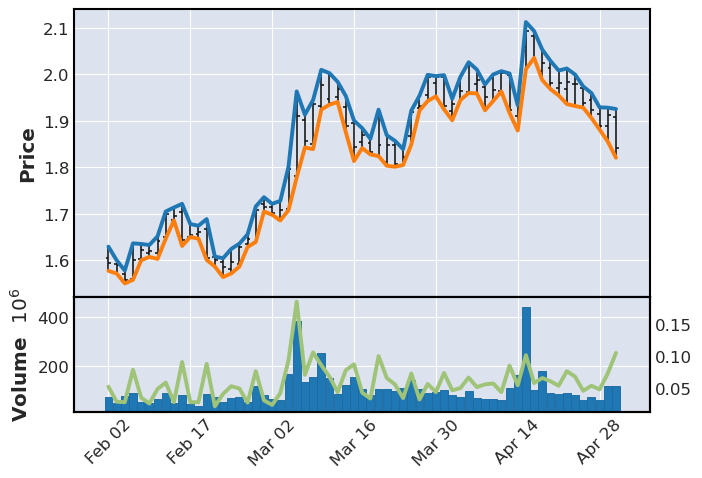

In [42]:
add_plots = [
    mpf.make_addplot(df_AAPL[["High", "Low"]]),
    mpf.make_addplot(df_AAPL["range"], panel=1, color="g"),
]
fig, *axes_objects = mpf.plot(df_AAPL, addplot=add_plots, volume=True, returnfig=True)

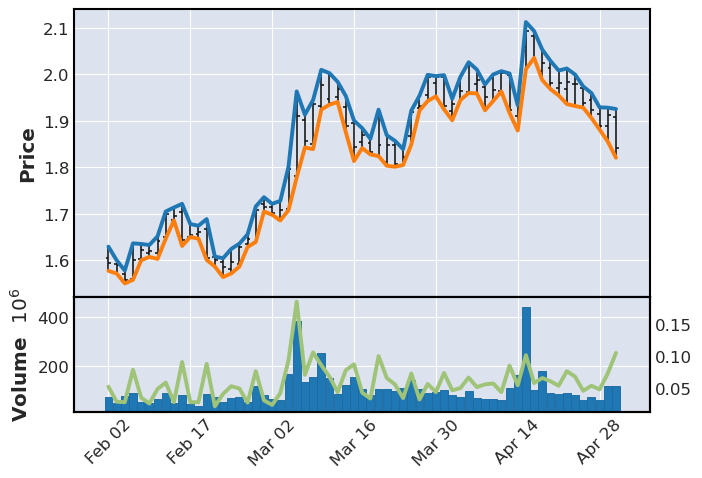

In [43]:
fig

In [44]:
axes_objects[0][3].set_ylabel("Range")

Text(697.7333333333332, 0.5, 'Range')

Notes:
- Makes alright plots
- API a bit strange
- Difficult to get access to underlying objects
- Good range of styles
- Has potential

## mpld3

In [45]:
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins
import numpy as np

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.grid(True, alpha=0.3)

for species in df_penguins["species"].unique():
    (l,) = ax.plot(
        df_penguins[df_penguins["species"] == species]["culmen_depth_mm"].values,
        df_penguins[df_penguins["species"] == species]["culmen_length_mm"].values,
        label=species,
        marker=".",
        markersize=20,
        linestyle="None",
    )

handles, labels = ax.get_legend_handles_labels()  # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(
    ax.lines, labels, alpha_unsel=0.1, alpha_over=1.5, start_visible=True
)

plugins.connect(fig, interactive_legend)

ax.set_xlabel("Culmen depth [mm]")
ax.set_ylabel("Culmen length [mm]")
ax.set_title("Culmen length vs depth", size=20)

mpld3.display(fig)

In [47]:
# plot line + confidence interval
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(True, alpha=0.3)

(l,) = ax.plot(df_AAPL.index, df_AAPL["Close"].values, label="AAPL")
ax.fill_between(
    df_AAPL.index, df_AAPL["Low"], df_AAPL["High"], color=l.get_color(), alpha=0.4
)


# for key, val in df.items():
#     l, = ax.plot(val.index, val.values, label=key)
#     ax.fill_between(val.index,
#                     val.values * .5, val.values * 1.5,
#                     color=l.get_color(), alpha=.4)

# define interactive legend

handles, labels = ax.get_legend_handles_labels()  # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(
    zip(handles, ax.collections),
    labels,
    alpha_unsel=0.5,
    alpha_over=1.5,
    start_visible=True,
)
plugins.connect(fig, interactive_legend)

# ax.set_xlabel('Date')
# ax.set_ylabel('y')
ax.set_title("AAPL stock", size=20)

mpld3.display(fig)

In [48]:
mpld3.save_html(fig, "fig.html")

Notes:
- Works well as an expansion to matplotlib code already written
- Interactivity through turning off and on groups of markers and being able to zoom in enables data that is dense or has a large range to be visualised
- Not being able to applied to all kinds of mpl plots, e.g. histograms, is unfortunately limiting

## great_tables

- Docs: https://posit.co/blog/introducing-great-tables-for-python-v0-1-0/

In [49]:
from great_tables import GT
from great_tables import html, md

import calendar

In [50]:
NY_housing_path = "../data/NY-House-Dataset.csv"

In [51]:
df_NY = pd.read_csv(NY_housing_path)

In [52]:
df_NY.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [54]:
cols_to_show = [
    "TYPE",
    "PRICE",
    "BEDS",
    "BATH",
    "PROPERTYSQFT",
    "ADDRESS",
    "STATE",
    "SUBLOCALITY",
    "STREET_NAME",
    "LONG_NAME",
]
source_address = (
    "https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market"
)

GT(
    df_NY[cols_to_show].head(10),
).tab_header(
    title=html("<strong>New York Housing Market</strong>"),
    subtitle=html("A sample of New York properties"),
).tab_source_note(source_note=f"Source: {source_address}")

TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,SUBLOCALITY,STREET_NAME,LONG_NAME
Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022",Manhattan,East 55th Street,Regis Residence
Condo for sale,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New York St Unit Penthouse,"New York, NY 10019",New York County,New York,West 57th Street
House for sale,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312",Richmond County,Staten Island,Sinclair Avenue
Condo for sale,69000,3,1.0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022",New York County,New York,East 55th Street
Townhouse for sale,55000000,7,2.3738608579684373,14175.0,5 E 64th St,"New York, NY 10065",New York County,New York,East 64th Street
House for sale,690000,5,2.0,4004.0,584 Park Pl,"Brooklyn, NY 11238",Kings County,Brooklyn,Park Place
Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027",New York,Manhattan,157
House for sale,16800000,8,16.0,33000.0,177 Benedict Rd,"Staten Island, NY 10304",Richmond County,Staten Island,Benedict Road
Co-op for sale,265000,1,1.0,750.0,875 Morrison Ave Apt 3M,"Bronx, NY 10473",East Bronx,Morrison Avenue,Parking lot
Co-op for sale,440000,2,1.0,978.0,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230",Brooklyn,Midwood,1350


In [55]:
# Get mean number of beds, baths, and median price, grouped by locality

In [56]:
NO_BEDS_COL = "No. beds"
NO_BATHS_COL = "No. baths"
FLOOR_AREA_COL = "Floor area [sqft]"
NO_LISTINGS_COL = "No. listings"
PRICE_COL = "Price"
LOCALITY_COL = "NY Locality"

rename_dict = {
    "LOCALITY": LOCALITY_COL,
    "BEDS": NO_BEDS_COL,
    "BATH": NO_BATHS_COL,
    "PROPERTYSQFT": FLOOR_AREA_COL,
    "ADDRESS": NO_LISTINGS_COL,
    "PRICE": PRICE_COL,
}

GT(
    pd.concat(
        [
            df_NY.groupby(by=["LOCALITY"])[
                ["BEDS", "BATH", "PROPERTYSQFT", "PRICE"]
            ].median(),
            df_NY.groupby(by=["LOCALITY"])[["ADDRESS"]].count(),
        ],
        axis=1,
    )
    .reset_index()
    .rename(columns=rename_dict)
).fmt_integer(
    columns=[NO_BEDS_COL, NO_BATHS_COL, FLOOR_AREA_COL, NO_LISTINGS_COL]
).fmt_currency(
    columns=PRICE_COL
).tab_spanner(
    label=md("*Median property properties*"),
    columns=[NO_BEDS_COL, NO_BATHS_COL, FLOOR_AREA_COL, PRICE_COL],
).tab_source_note(
    source_note=f"Source: {source_address}"
).tab_header(
    title=html("<strong>Properties across New York</strong>"),
    subtitle=html("Average property properties by New York localities"),
)

GT(_tbl_data=        NY Locality  No. beds  No. baths  Floor area [sqft]      Price  \
0      Bronx County       2.0   1.000000         950.000000   279900.0   
1          Brooklyn       2.0   1.000000         755.000000   607000.0   
2          Flatbush       3.0   1.000000        1050.000000   650000.0   
3      Kings County       2.0   1.000000        1006.000000   554000.0   
4          New York       4.0   2.373861        2184.207862   995000.0   
5   New York County       2.0   2.000000        2184.207862  1050000.0   
6            Queens       2.0   1.000000        1692.103931   453000.0   
7     Queens County       2.0   1.000000        2184.207862   375000.0   
8   Richmond County       2.0   1.000000         900.000000   350000.0   
9         The Bronx       2.0   1.000000        1450.000000   295000.0   
10    United States       3.0   2.373861        2184.207862   880000.0   

    No. listings  
0            182  
1              6  
2              1  
3            464  
4           2505  
5            979  
6              6  
7            557  
8             59  
9              5  
10            37  , _body=<great_tables._gt_data.Body object at 0x7f911bf06600>, _boxhead=Boxhead([ColInfo(var='NY Locality', type=<ColInfoTypeEnum.default: 1>, column_label='NY Locality', column_align='left', column_width=None), ColInfo(var='No. beds', type=<ColInfoTypeEnum.default: 1>, column_label='No. beds', column_align='right', column_width=None), ColInfo(var='No. baths', type=<ColInfoTypeEnum.default: 1>, column_label='No. baths', column_align='right', column_width=None), ColInfo(var='Floor area [sqft]', type=<ColInfoTypeEnum.default: 1>, column_label='Floor area [sqft]', column_align='right', column_width=None), ColInfo(var='Price', type=<ColInfoTypeEnum.default: 1>, column_label='Price', column_align='right', column_width=None), ColInfo(var='No. listings', type=<ColInfoTypeEnum.default: 1>, column_label='No. listings', column_align='right', column_width=None)]), _stub=Stub([RowInfo(rownum_i=0, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=1, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=2, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=3, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=4, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=5, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=6, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=7, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=8, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=9, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=10, group_id=None, rowname=None, group_label=None, built=False)]), _row_groups=[], _group_rows=GroupRows([]), _spanners=Spanners([SpannerInfo(spanner_id=<great_tables._text.Text object at 0x7f911bf145c0>, spanner_level=0, spanner_label=<great_tables._text.Text object at 0x7f911bf145c0>, spanner_units=None, spanner_pattern=None, vars=['No. beds', 'No. baths', 'Floor area [sqft]', 'Price'], built=None)]), _heading=Heading(title=<great_tables._text.Text object at 0x7f911bd87620>, subtitle=<great_tables._text.Text object at 0x7f911b46c1d0>, preheader=None), _stubhead=None, _source_notes=['Source: https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f911ae0f2c0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7f911bf06300>, <great_tables._gt_data.FormatInfo object at 0x7f911ad69fd0>], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_la

In [57]:
WALMART_SALES_FILE = "../data/Walmart_sales.csv"

In [58]:
df_sales = pd.read_csv(WALMART_SALES_FILE)

In [59]:
df_sales["Date"] = pd.to_datetime(df_sales["Date"], format="%d-%m-%Y")

In [60]:
df_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [61]:
df_sales.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [62]:
df_sales.sort_values(by=["Store", "Date"])

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [63]:
df_sales = df_sales.loc[df_sales["Store"] < 6, :]

In [64]:
df_sales.loc[:, "Month"] = df_sales["Date"].dt.month  # .strftime('%b')

In [65]:
groupby = df_sales.groupby(by=["Month", "Store"])["Weekly_Sales"].mean().unstack()

In [66]:
groupby_percentage_sales_per_month = groupby / groupby.sum(axis=0)

In [67]:
groupby_percentage_sales_per_month.sort_index()

Store,1,2,3,4,5
Month,,,,,
1,0.074840,0.074613,0.076036,0.075900,0.074584
2,0.086863,0.087435,0.089224,0.086365,0.083588
3,0.083779,0.081862,0.083854,0.080729,0.081604
4,0.082538,0.080970,0.081328,0.079352,0.084344
5,0.082410,0.081414,0.080847,0.080395,0.083118
6,0.083446,0.083875,0.082497,0.081610,0.083616
7,0.079037,0.079009,0.077572,0.079045,0.078154
8,0.082702,0.081577,0.079472,0.082467,0.080172
9,0.079467,0.076559,0.077883,0.079440,0.079675


In [68]:
groupby_percentage_sales_per_month.reset_index(inplace=True)

In [69]:
groupby_percentage_sales_per_month["Month"] = groupby_percentage_sales_per_month[
    "Month"
].apply(lambda x: calendar.month_abbr[x])

In [70]:
groupby_percentage_sales_per_month.columns = (
    groupby_percentage_sales_per_month.columns.astype("str")
)

In [71]:
GT(
    groupby_percentage_sales_per_month,
    rowname_col="Month",
).data_color(
    # domain=[0.8, 0.10],
    palette=["rebeccapurple", "white", "orange"],
    na_color="white",
).tab_header(
    title="Average percentage yearly sales by month for five Walmart stores",
    # subtitle=html("Average monthly values at latitude of 20&deg;N."),
).tab_source_note(
    source_note=f"Source: https://www.kaggle.com/datasets/mikhail1681/walmart-sales"
).fmt_percent(
    [
        "1",
        "2",
        "3",
        "4",
        "5",
    ],
    decimals=2,
)

,1,2,3,4,5
Jan,7.48%,7.46%,7.60%,7.59%,7.46%
Feb,8.69%,8.74%,8.92%,8.64%,8.36%
Mar,8.38%,8.19%,8.39%,8.07%,8.16%
Apr,8.25%,8.10%,8.13%,7.94%,8.43%
May,8.24%,8.14%,8.08%,8.04%,8.31%
Jun,8.34%,8.39%,8.25%,8.16%,8.36%
Jul,7.90%,7.90%,7.76%,7.90%,7.82%
Aug,8.27%,8.16%,7.95%,8.25%,8.02%
Sep,7.95%,7.66%,7.79%,7.94%,7.97%
Oct,8.00%,7.87%,7.97%,8.13%,7.88%


Notes:
- Good package that sets out what it aims to do
- Chainable methods, with many options, make it a flexible way to present tables and recreate them programatically
- LaTeX output would be amazing